<a href="https://colab.research.google.com/github/Husayn01/ML_Projects/blob/main/House_Prices_Advanced_Regression_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load & Inspect the Data**

In [4]:
from google.colab import files
files.upload()

Saving data_description.txt to data_description.txt
Saving sample_submission.csv to sample_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'data_description.txt': b"MSSubClass: Identifies the type of dwelling involved in the sale.\t\n\n        20\t1-STORY 1946 & NEWER ALL STYLES\n        30\t1-STORY 1945 & OLDER\n        40\t1-STORY W/FINISHED ATTIC ALL AGES\n        45\t1-1/2 STORY - UNFINISHED ALL AGES\n        50\t1-1/2 STORY FINISHED ALL AGES\n        60\t2-STORY 1946 & NEWER\n        70\t2-STORY 1945 & OLDER\n        75\t2-1/2 STORY ALL AGES\n        80\tSPLIT OR MULTI-LEVEL\n        85\tSPLIT FOYER\n        90\tDUPLEX - ALL STYLES AND AGES\n       120\t1-STORY PUD (Planned Unit Development) - 1946 & NEWER\n       150\t1-1/2 STORY PUD - ALL AGES\n       160\t2-STORY PUD - 1946 & NEWER\n       180\tPUD - MULTILEVEL - INCL SPLIT LEV/FOYER\n       190\t2 FAMILY CONVERSION - ALL STYLES AND AGES\n\nMSZoning: Identifies the general zoning classification of the sale.\n\t\t\n       A\tAgriculture\n       C\tCommercial\n       FV\tFloating Village Residential\n       I\tIndustrial\n       RH\tResidential High Density\n      

In [6]:
import pandas as pd
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [12]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [11]:
with open('data_description.txt', "r") as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

**Key Observations from Your Data:**

1460 entries, 81 columns (including target SalePrice)

43 categorical (object) vs. 35 numeric (int/float) features

Significant missing data in:

Alley (91 non-null)

PoolQC (7 non-null)

MiscFeature (54 non-null)

Fence (281 non-null)

Basement/Garage-related features (~50-80 missing)

# **Step 2: Data Preprocessing**

In [45]:
df_cleaned = df.drop(['Alley', 'PoolQC', 'MiscFeature', 'Fence'], axis=1)
df_cleaned.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [47]:
# Fill LotFrontage with neighborhood median
df_cleaned['LotFrontage'] = df_cleaned.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(x.median())
)

# Fill remaining LotFrontage with overall median (if any neighborhood had all missing)
df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(), inplace=True)

# MasVnrArea: Fill 0 where missing (assuming no masonry veneer)
df_cleaned['MasVnrArea'].fillna(0, inplace=True)

# GarageYrBlt: Fill with YearBuilt where garage exists but year is missing
garage_exists = df_cleaned['GarageType'].notna()
df_cleaned.loc[garage_exists, 'GarageYrBlt'] = df_cleaned.loc[garage_exists, 'GarageYrBlt'].fillna(
    df_cleaned.loc[garage_exists, 'YearBuilt']
)

<ipython-input-47-c9ce505796a0>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['LotFrontage'].fillna(df_cleaned['LotFrontage'].median(), inplace=True)
<ipython-input-47-c9ce505796a0>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [48]:
# List of columns where "None" indicates absence
none_cols = [
    'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond',
    'FireplaceQu', "GarageYrBlt"
]

# Fill with "None" for missing values
for col in none_cols:
    df_cleaned[col].fillna('None', inplace=True)

# Electrical: Fill single missing value with mode
df_cleaned['Electrical'].fillna(df['Electrical'].mode()[0], inplace=True)

<ipython-input-48-8f5ee7927383>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna('None', inplace=True)
<ipython-input-48-8f5ee7927383>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'None' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_cleaned[col].fillna('None', inplace=True)
<ipython-input-48-8f5ee7927383>:14: FutureWarning: A value is trying to be set on a copy of a Data

In [49]:
# Check remaining missing values
print(df_cleaned.isnull().sum().sort_values(ascending=False).head(10))

# Expected output should show 0 missing values

Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
Street         0
LotShape       0
LandContour    0
Utilities      0
LotConfig      0
dtype: int64


In [52]:
df_cleaned.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 77 columns]

In [51]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [53]:
import plotly.express as px
import numpy as np

# Example: Histogram for GrLivArea
fig = px.histogram(df_cleaned, x='GrLivArea', nbins=30, title='Distribution of GrLivArea')
fig.show()

# Check skewness
print("Skewness of GrLivArea:", df_cleaned['GrLivArea'].skew())

# If skewness > 1 or < -1, log transform
df_cleaned['GrLivArea_log'] = np.log1p(df_cleaned['GrLivArea'])
fig = px.histogram(df_cleaned, x='GrLivArea_log', nbins=30, title='Log-Transformed GrLivArea')
fig.show()


Skewness of GrLivArea: 1.3665603560164552


In [58]:
# Scatter plot of GrLivArea vs. SalePrice
fig = px.scatter(df_cleaned, x='GrLivArea', y='SalePrice',
                 title='GrLivArea vs SalePrice', trendline='ols')
fig.show()

In [63]:
# Keep only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Compute correlation with SalePrice
correlation = numeric_df.corr()['SalePrice'].sort_values(ascending=False).round(3)
correlation.head(10)

SalePrice        1.000
OverallQual      0.791
GrLivArea        0.709
GrLivArea_log    0.695
GarageCars       0.640
GarageArea       0.623
TotalBsmtSF      0.614
1stFlrSF         0.606
FullBath         0.561
TotRmsAbvGrd     0.534
Name: SalePrice, dtype: float64

In [65]:
import plotly.figure_factory as ff

# Correlation matrix heatmap (top features)
corr_matrix = numeric_df.corr()
top_corr = corr_matrix.nlargest(10, 'SalePrice')['SalePrice'].index
top_corr_matrix = corr_matrix.loc[top_corr, top_corr]

fig = ff.create_annotated_heatmap(
    z=top_corr_matrix.values.round(2),
    x=top_corr_matrix.columns.tolist(),
    y=top_corr_matrix.index.tolist(),
    colorscale='Viridis'
)
fig.update_layout(title='Top Feature Correlations with SalePrice')
fig.show()


In [67]:
# Top correlated features (from your analysis)
features = [
    'OverallQual', 'GrLivArea', 'GarageCars',
    'TotalBsmtSF', '1stFlrSF', 'FullBath',
    'TotRmsAbvGrd'
]

X = df_cleaned[features]  # Features
y = df_cleaned['SalePrice']  # Target

In [68]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Numeric preprocessing: Impute median + scale
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [71]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [72]:
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = model.predict(X_test)

# Metrics
print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R² Score: 0.7920245670275232
RMSE: 39940.44834475294


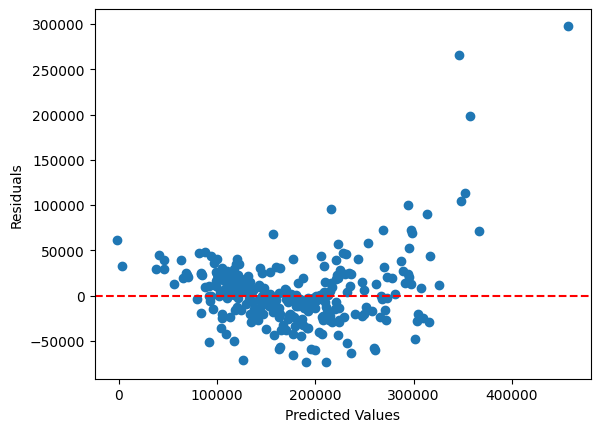

In [73]:
import matplotlib.pyplot as plt

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='--')

In [76]:
test_df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      6    2010        WD         Normal  
1   12500      6    2010        WD         Normal  
2       0      3    2010        WD         Normal  
3       0      6    2010        WD         Normal  
4       0      1    2010        WD         Normal  

[5 rows x 80 columns]

In [77]:
# Select the same features used in training
test_features = test_df[['OverallQual', 'GrLivArea', 'GarageCars',
                          'TotalBsmtSF', '1stFlrSF', 'FullBath',
                          'TotRmsAbvGrd']]

# Handle missing values (if any)
test_features = test_features.fillna(test_features.median())

In [78]:
predictions = model.predict(test_features)

In [79]:
submission = pd.DataFrame({
    'Id': test_df['Id'],          # Use the 'Id' column from your test data
    'SalePrice': predictions         # Your model's predicted prices
})

In [80]:
# (Optional) Round decimals to 4 places if needed
submission['SalePrice'] = submission['SalePrice'].round(4)

# Verify the output format
print(submission.head())

     Id    SalePrice
0  1461  106580.1966
1  1462  162056.6971
2  1463  158699.8658
3  1464  180824.4597
4  1465  227953.8568


In [81]:
submission.to_csv('submission.csv', index=False)

In [82]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>